In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [30]:
df = pd.read_csv('dados/transformado.csv',sep=',',encoding = "UTF-8")

In [31]:
df.tail()

,partida_id,rodada,mandante,visitante,formacao_mandante,formacao_visitante,vencedor,mandante_placar,visitante_placar,chutes_mandante,...,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante,temporada,resultado,total_gols
1871,8021,38,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,Cuiaba,2,1,17,...,389,0.82,8,3,1,2,1,2022,1,3
1872,8022,38,Bragantino,Fluminense,4-2-3-1,4-2-3-1,Fluminense,0,1,13,...,463,0.82,15,2,0,0,9,2022,2,1
1873,8023,38,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,Atletico-MG,0,1,17,...,351,0.82,19,6,0,0,4,2022,2,1
1874,8024,38,Internacional,Palmeiras,4-2-3-1,4-2-3-1,Internacional,3,0,15,...,306,0.82,17,3,0,2,5,2022,1,3
1875,8025,38,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,Sao Paulo,0,4,6,...,591,0.90,14,1,0,0,4,2022,2,4


In [32]:
print("Temporadas há serem analisadas: ", str(df.temporada.unique()))
print("Total de Partidas:", df.shape[0])
print("Total de Gols :", df.total_gols.sum())
print("Media de Gols por partida :", df.total_gols.mean())

Temporadas há serem analisadas:  [2018 2019 2020 2021 2022]
Total de Partidas: 1876
Total de Gols : 4344
Media de Gols por partida : 2.3155650319829424


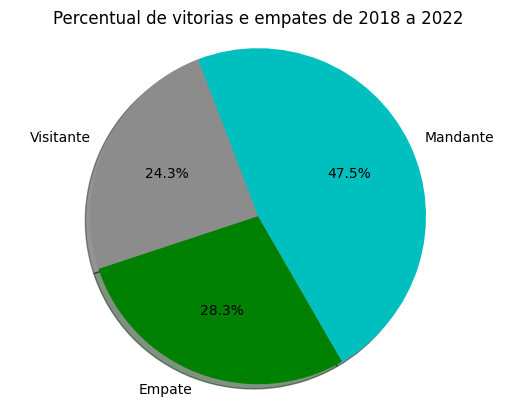

In [33]:
mandante = len(df.resultado[(df['resultado']==1)])
visitante = len(df.resultado[(df['resultado']==2)])
empate = len(df.resultado[(df['resultado']==3)])
sizes  =[mandante,visitante,empate]
label = ["Mandante","Visitante","Empate"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=label,autopct='%1.1f%%', shadow=True,startangle=300,colors=["c",".55","g"])
ax1.set_title("Percentual de vitorias e empates de 2018 a 2022")
ax1.axis('equal')
plt.show()

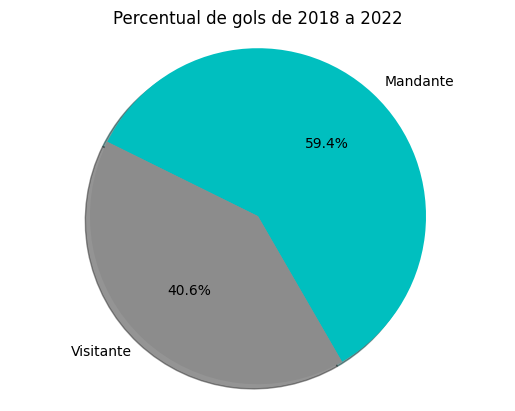

In [34]:
mandante = df.mandante_placar.sum()
visitante = df.visitante_placar.sum()
#visitante = len(df.resultado[(df['']==2)])

sizes  =[mandante,visitante]
label = ["Mandante","Visitante"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=label,autopct='%1.1f%%', shadow=True,startangle=300,colors=["c",".55"])
ax1.set_title("Percentual de gols de 2018 a 2022")
ax1.axis('equal')
plt.show()

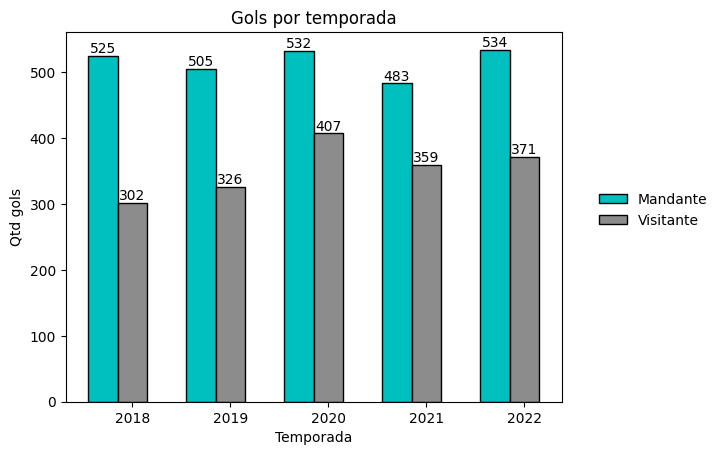

In [35]:
tgols_mandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"mandante_placar" :'sum'})).reset_index()
tgols_visitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"visitante_placar" :'sum'})).reset_index()

width = 0.30
r1 = np.arange(len( tgols_mandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, tgols_mandante['mandante_placar'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, tgols_visitante['visitante_placar'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd gols")
plt.title("Gols por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

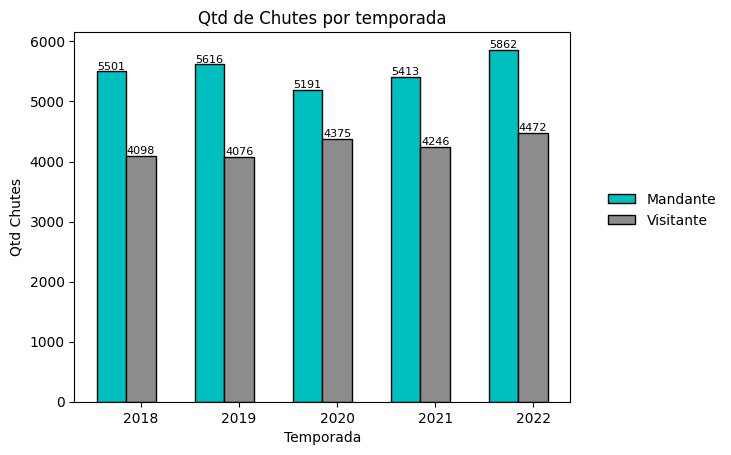

In [36]:
#Chutes e Chutes ao alvo Mandante Visitante
chutes_mandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"chutes_mandante" :'sum'})).reset_index()
chutes_visitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"chutes_visitante" :'sum'})).reset_index()

width = 0.30
r1 = np.arange(len( chutes_mandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, chutes_mandante['chutes_mandante'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, chutes_visitante['chutes_visitante'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd Chutes")
plt.title("Qtd de Chutes por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=8, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=8, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

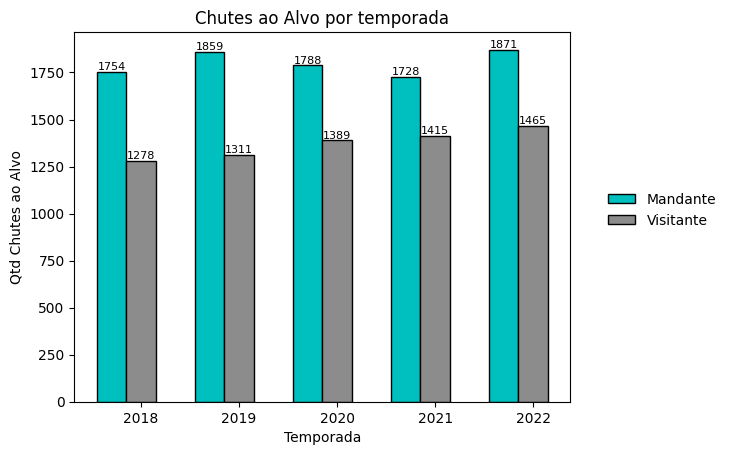

In [37]:
#Chutes ao alvo
chutes_Alvomandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"chutes_no_alvo_mandante" :'sum'})).reset_index()
chutes_Alvovisitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"chutes_no_alvo_visitante" :'sum'})).reset_index()


width = 0.30
r1 = np.arange(len( chutes_Alvomandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, chutes_Alvomandante['chutes_no_alvo_mandante'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, chutes_Alvovisitante['chutes_no_alvo_visitante'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd Chutes ao Alvo")
plt.title("Chutes ao Alvo por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=8, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=8, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

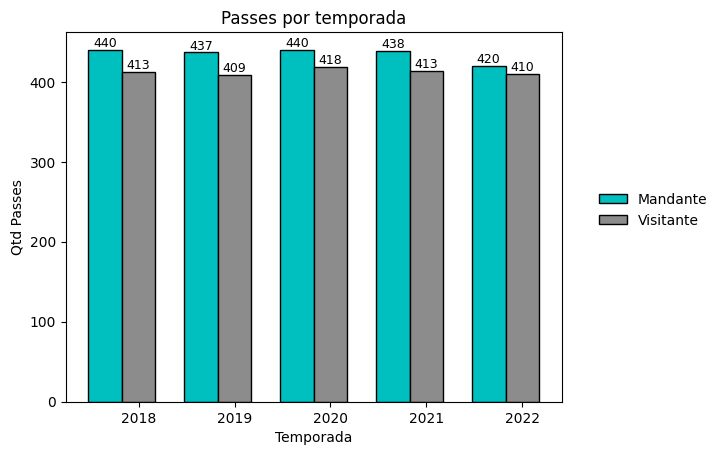

In [38]:
# Passes Mandante e Visitante
passesmandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"passes_mandante" :'mean'})).reset_index()
passesvisitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"passes_visitante" :'mean'})).reset_index()

width = 0.35
r1 = np.arange(len( passesmandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, passesmandante['passes_mandante'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, passesvisitante['passes_visitante'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd Passes")
plt.title("Passes por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=9, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=9, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

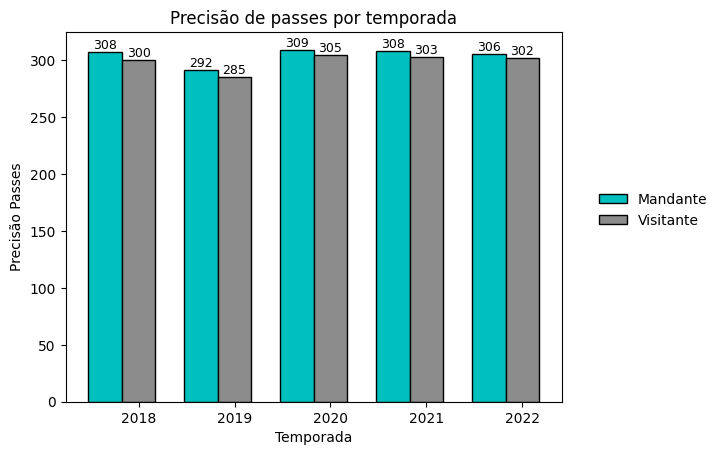

In [39]:
# Precisão de passes Mandante e Visitante
precisao_passesmandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"precisao_passes_mandante" :'sum'})).reset_index()
precisao_passesvisitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"precisao_passes_visitante" :'sum'})).reset_index()


width = 0.35
r1 = np.arange(len( precisao_passesmandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, precisao_passesmandante['precisao_passes_mandante'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, precisao_passesvisitante['precisao_passes_visitante'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(precisao_passesmandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Precisão Passes")
plt.title("Precisão de passes por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=9, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=9, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

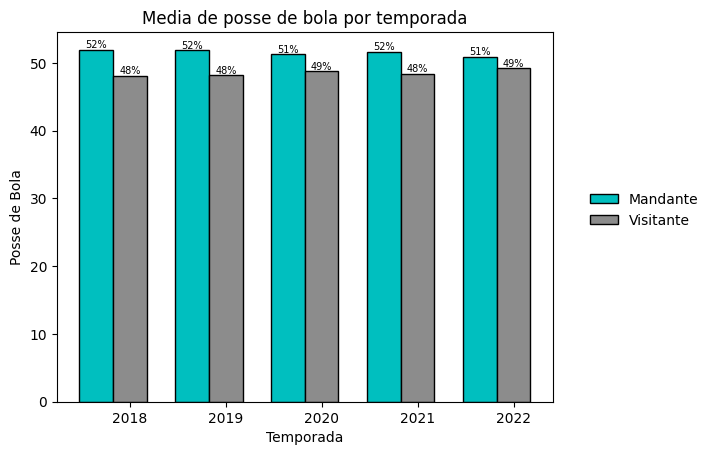

In [40]:
# Posse de bola  Mandante e Visitante
posse_bola_mandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"posse_de_bola_mandante" :'mean'})).reset_index()
posse_bola_visitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"posse_de_bola_visitante" :'mean'})).reset_index()

width = 0.35
r1 = np.arange(len( posse_bola_mandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, posse_bola_mandante['posse_de_bola_mandante']*100, color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, posse_bola_visitante['posse_de_bola_visitante']*100, color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(posse_bola_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Posse de Bola")
plt.title("Media de posse de bola por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="{:.0f}%", size=7, label_type="edge")
plt.bar_label(plt2, fmt="{:.0f}%", size=7, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

In [41]:
#criando dataframe para analisar atributos de vitoria e derrota
dfVitoriaDerrota =  pd.DataFrame(df[['temporada','mandante','visitante','vencedor','precisao_passes_mandante','precisao_passes_visitante','posse_de_bola_mandante','posse_de_bola_visitante','chutes_mandante','chutes_visitante','chutes_no_alvo_mandante','chutes_no_alvo_visitante','visitante_placar','mandante_placar','passes_mandante','passes_visitante']])
dfVitoriaDerrota = dfVitoriaDerrota[(dfVitoriaDerrota['vencedor']!= '-')]


dfVitoriaDerrota['gols_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["mandante_placar"] if x['mandante'] == x['vencedor'] else x['visitante_placar'],axis=1)
dfVitoriaDerrota['gols_derrota'] = dfVitoriaDerrota.apply(lambda x: x["visitante_placar"] if x['mandante'] == x['vencedor'] else x['mandante_placar'],axis=1)

dfVitoriaDerrota['chutes_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["chutes_mandante"] if x['mandante'] == x['vencedor'] else x['chutes_visitante'],axis=1)
dfVitoriaDerrota['chutes_derrota'] = dfVitoriaDerrota.apply(lambda x: x["chutes_visitante"] if x['mandante'] == x['vencedor'] else x['chutes_mandante'],axis=1)

dfVitoriaDerrota['chutes_no_alvo_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["chutes_no_alvo_mandante"] if x['mandante'] == x['vencedor'] else x['chutes_no_alvo_visitante'],axis=1)
dfVitoriaDerrota['chutes_no_alvo_derrota'] = dfVitoriaDerrota.apply(lambda x: x["chutes_no_alvo_visitante"] if x['mandante'] == x['vencedor'] else x['chutes_no_alvo_mandante'],axis=1)

#quantos chutes eu preciso para fazer um gol.
dfVitoriaDerrota['chute_para_gol_vitoria'] = dfVitoriaDerrota.apply(lambda x: (x['chutes_vitoria']/x['gols_vitoria']) if x['gols_vitoria'] != 0 else 0 ,axis=1)
dfVitoriaDerrota['chute_para_gol_derrota'] = dfVitoriaDerrota.apply(lambda x: (x['chutes_derrota']/x['gols_derrota']) if x['gols_derrota'] != 0 else 0 ,axis=1)


dfVitoriaDerrota['passes_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["passes_mandante"] if x['mandante'] == x['vencedor'] else x['passes_visitante'],axis=1)
dfVitoriaDerrota['passes_derrota'] = dfVitoriaDerrota.apply(lambda x: x["passes_visitante"] if x['mandante'] == x['vencedor'] else x['passes_mandante'],axis=1)

dfVitoriaDerrota['precisao_passes_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["precisao_passes_mandante"] if x['mandante'] == x['vencedor'] else x['precisao_passes_visitante'],axis=1)
dfVitoriaDerrota['precisao_passes_derrota'] = dfVitoriaDerrota.apply(lambda x: x["precisao_passes_visitante"] if x['mandante'] == x['vencedor'] else x['precisao_passes_mandante'],axis=1)

dfVitoriaDerrota['possebola_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["posse_de_bola_mandante"] if x['mandante'] == x['vencedor'] else x['posse_de_bola_visitante'],axis=1)
dfVitoriaDerrota['possebola_derrota'] = dfVitoriaDerrota.apply(lambda x: x["posse_de_bola_visitante"] if x['mandante'] == x['vencedor'] else x['posse_de_bola_mandante'],axis=1)

dfVitoriaDerrota.drop(columns=['mandante','visitante','vencedor','precisao_passes_mandante','precisao_passes_visitante','posse_de_bola_mandante','posse_de_bola_visitante','chutes_mandante','chutes_visitante','chutes_no_alvo_mandante','chutes_no_alvo_visitante','visitante_placar','mandante_placar','passes_mandante','passes_visitante'],inplace=True)

dfVitoriaDerrota


,temporada,gols_vitoria,gols_derrota,chutes_vitoria,chutes_derrota,chutes_no_alvo_vitoria,chutes_no_alvo_derrota,chute_para_gol_vitoria,chute_para_gol_derrota,passes_vitoria,passes_derrota,precisao_passes_vitoria,precisao_passes_derrota,possebola_vitoria,possebola_derrota
0,2018,1,0,6,12,2,2,6.000000,0.0,649,425,0.86,0.81,0.60,0.40
2,2018,2,0,22,10,3,2,11.000000,0.0,532,472,0.90,0.85,0.54,0.46
3,2018,3,0,14,15,4,5,4.666667,0.0,363,580,0.76,0.85,0.38,0.62
4,2018,2,1,19,11,7,6,9.500000,11.0,596,321,0.88,0.78,0.67,0.33
5,2018,2,0,13,12,4,2,6.500000,0.0,412,491,0.75,0.82,0.45,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,2022,2,1,17,4,8,2,8.500000,4.0,505,389,0.88,0.82,0.57,0.43
1872,2022,1,0,8,13,4,4,8.000000,0.0,463,319,0.82,0.77,0.59,0.41
1873,2022,1,0,17,17,7,4,17.000000,0.0,351,494,0.82,0.84,0.41,0.59
1874,2022,3,0,15,11,8,2,5.000000,0.0,287,306,0.77,0.82,0.48,0.52


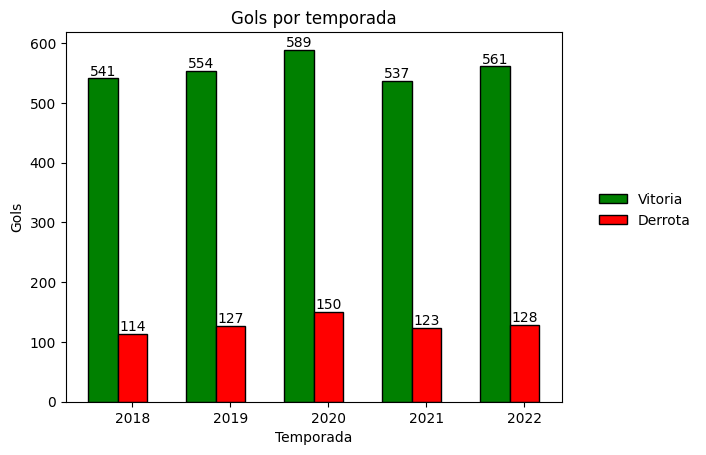

In [42]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"gols_vitoria" :'sum'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"gols_derrota" :'sum'})).reset_index()

width = 0.30
r1 = np.arange(len(derrota['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.gols_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.gols_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Gols")
plt.title("Gols por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

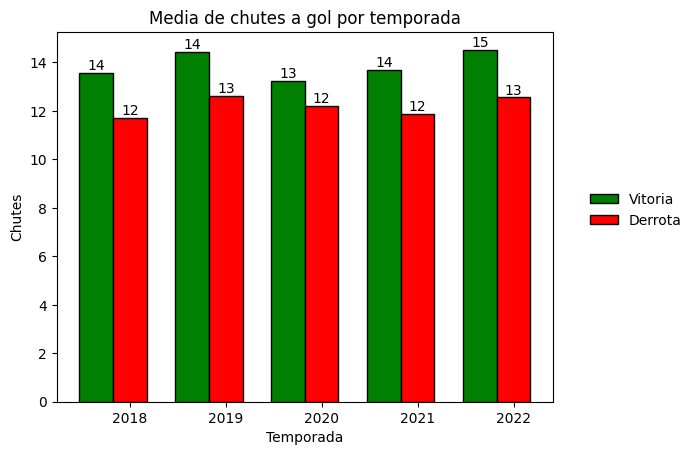

In [43]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_derrota" :'mean'})).reset_index()

width = 0.35
r1 = np.arange(len(derrota['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.chutes_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.chutes_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Chutes")
plt.title("Media de chutes a gol por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

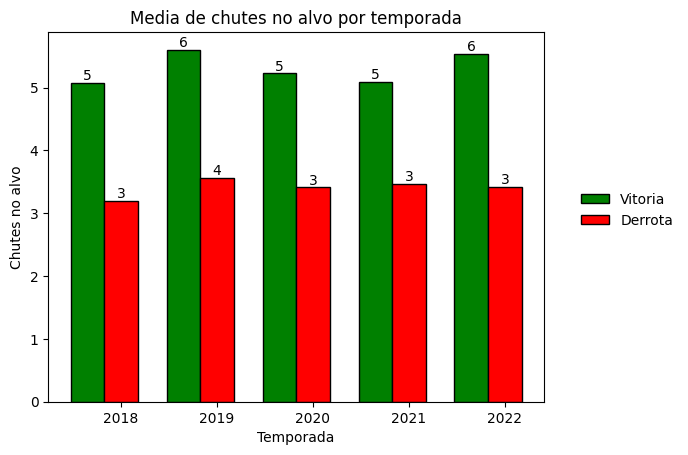

In [44]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_no_alvo_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_no_alvo_derrota" :'mean'})).reset_index()


width = 0.35
r1 = np.arange(len(derrota['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.chutes_no_alvo_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.chutes_no_alvo_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Chutes no alvo")
plt.title("Media de chutes no alvo por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

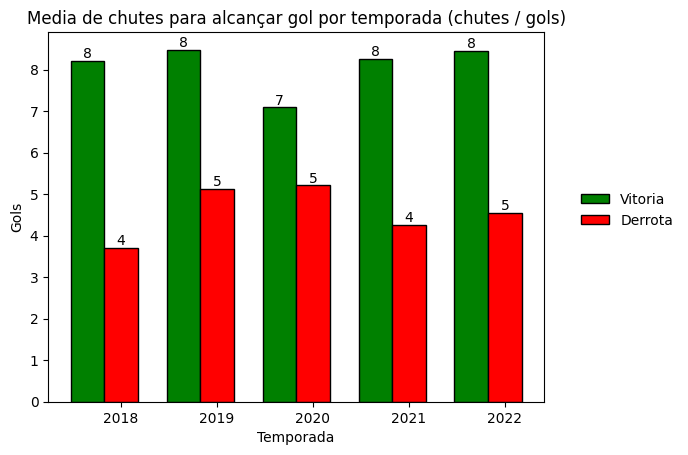

In [45]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chute_para_gol_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chute_para_gol_derrota" :'mean'})).reset_index()

width = 0.35
r1 = np.arange(len(derrota['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.chute_para_gol_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.chute_para_gol_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Gols")
plt.title("Media de chutes para alcançar gol por temporada (chutes / gols)")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

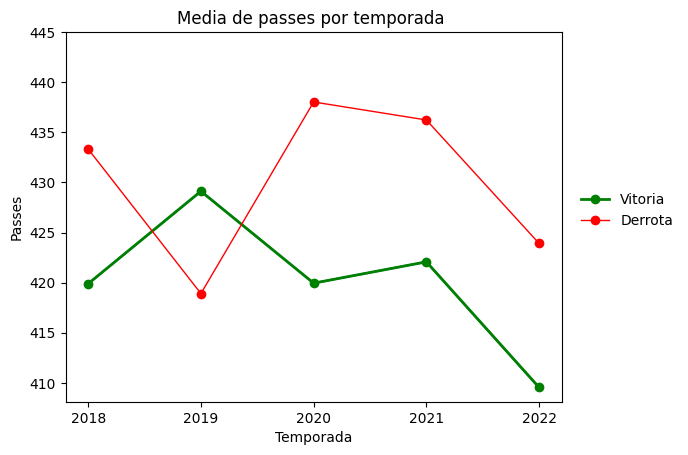

In [46]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"passes_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"passes_derrota" :'mean'})).reset_index()


x = vitoria.temporada
y =vitoria.passes_vitoria

x1 = derrota.temporada
y1 =derrota.passes_derrota
plt.plot(x,y)

plt.plot(x, y, ls='-', lw='2', marker='o',color='green',label="Vitoria")
plt.plot(x1, y1, ls='-', lw='1', marker='o',color='red',label="Derrota")
plt.xlabel("Temporada")
plt.ylabel("Passes")
plt.title("Media de passes por temporada ")
plt.xticks(list(x))
plt.yticks([410,415,420,425,430,435,440,445])
plt.legend(frameon=False,bbox_to_anchor=(1.25, 0.6) )
plt.show()

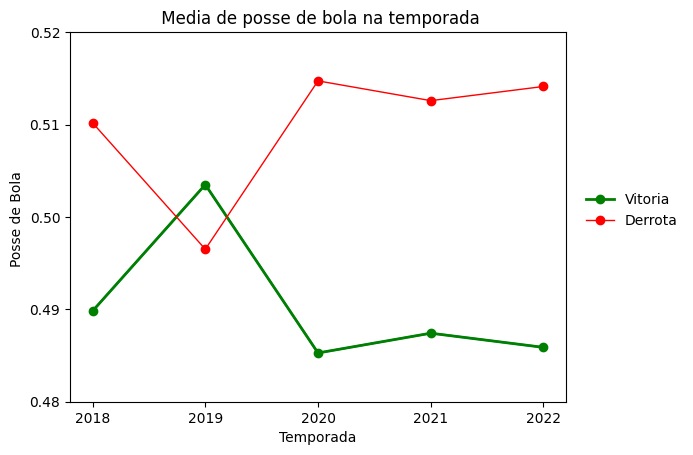

In [47]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"possebola_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"possebola_derrota" :'mean'})).reset_index()


x = vitoria.temporada
y =vitoria.possebola_vitoria

x1 = derrota.temporada
y1 =derrota.possebola_derrota
plt.plot(x,y)

plt.plot(x, y, ls='-', lw='2', marker='o',color='green',label="Vitoria")
plt.plot(x1, y1, ls='-', lw='1', marker='o',color='red',label="Derrota")
plt.xlabel("Temporada")
plt.ylabel("Posse de Bola ")
plt.title(" Media de posse de bola na temporada")
plt.xticks(list(x))
plt.yticks([.48,.49,.50,.51,.52])
plt.legend(frameon=False,bbox_to_anchor=(1.25, 0.6) )
plt.show()